# GA Data Science SVM Lab


In this lab/lecture, we will learn about the Support Vector Machine classifier

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
from seaborn import plt

In [21]:
from sklearn import svm

##Linear SVMs: some intuitions
To develop our intuitions, let us look at a very simple classification problem: classifying irises based on sepal length and width. We only use 2 features to enable easy visualization.


In [22]:
svc = svm.SVC(kernel='linear')
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

To visualize the prediction, we evaluate it on a grid of points:

In [23]:
#Plotting the decision boundary
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

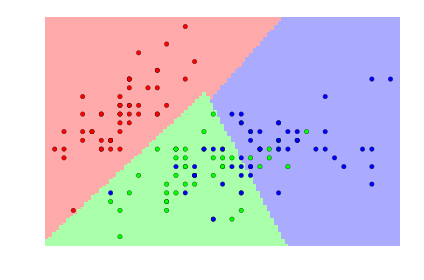

In [24]:
plot_estimator(svc, X, y)

#linear decision modeling
#3 different types of data points
#not perfectly linear because we don't generate that many data points...the more data points, the more linaer

As we can see, kernel="linear" gives linear decision frontiers: the frontier between two classes is a line.

How does multi-class work? With the SVC object, it is done by combining "one versus one" decisions on each pair of classes.

LinearSVC: for linear kernels, there is another object, the LinearSVC that uses a different algorithm. On some data it may be faster (for instance sparse data, as in text mining). It uses a "one versus all" strategy for multi-class problems.

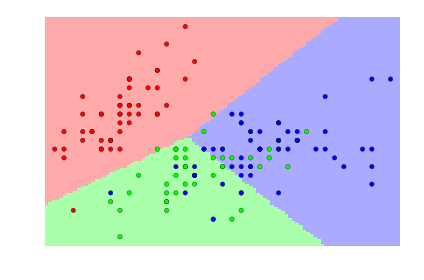

In [25]:
#linear kernal that uses a different algorithm. Does not use 1 against 1, uses 1 against the rest
plot_estimator(svm.LinearSVC(), X, y)

Note: SVRs (Support Vector Regression) work like SVCs, but for regression rather than classification.



##Support vectors and regularisation
Support vectors: The way a support vector machine works is by finding a decision boundary separating the 2 classes that is spanned by a small number of training samples, called "support vectors". These samples lie closest to the other class, and can thus be considered as most representative samples in terms of the two-class discrimination problem.

To make visualization even simpler, let us consider a 2 class problem, for instance using classes 1 and 2 in the iris dataset. These 2 classes are not well linearly separable, which makes it an interesting problem.

The indices of the support vectors for each class can be found in the support_vectors_ attribute. We highlight them in the following figure.

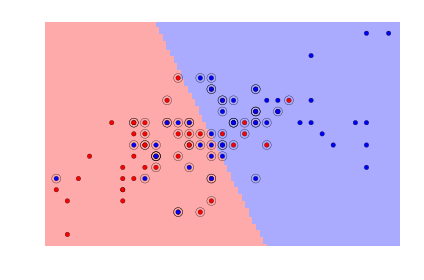

In [27]:
#Plotting the support vectors
#Can use different c values--high c = more restricted boundary, so smaller decision vectors
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)


Regularization: Considering only the discriminant samples is a form of regularization. Indeed, it forces the model to be simpler in how it combines observed structures.

This regularization can be tuned with the C parameter:

-Low C values: many support vectors... Decision frontier = mean(class A) - mean(class B)

-High C values: small number of support vectors: Decision frontier fully driven by most disriminant samples

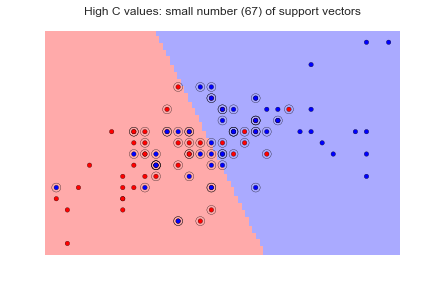

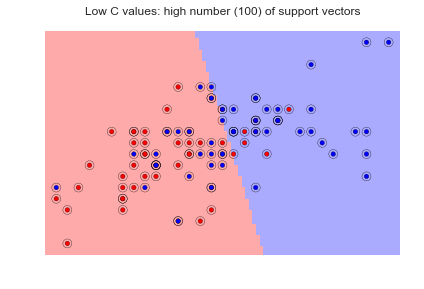

In [28]:
#c values chooss how we want to penalize the misclassified data points
svc_hiC = svm.SVC(kernel='linear', C=1e3)  # C = 1,000
plot_estimator(svc_hiC, X, y)
plt.scatter(svc_hiC.support_vectors_[:, 0], svc_hiC.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('High C values: small number ({:,}) of support vectors'.format(len(svc_hiC.support_vectors_)))

svc_loC = svm.SVC(kernel='linear', C=1e-3)  # C = 0.001
plot_estimator(svc_loC, X, y)
plt.scatter(svc_loC.support_vectors_[:, 0], svc_loC.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Low C values: high number ({:,}) of support vectors'.format(len(svc_loC.support_vectors_)))

One nice features of SVMs is that on many datasets, the default value 'C=1' works well.

Practical note: Normalizing data For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is often important to get good prediction.

##Exercise: Tune an SVM on the digits dataset¶

### the digits dataset [link](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

In [29]:
from sklearn import datasets
import numpy as np
digits = datasets.load_digits()
X, y = digits.data, digits.target
print X.shape

(1797, 64)


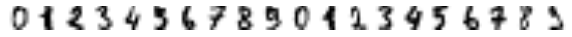

In [31]:
#Let's First visualize the contents of the dataset
import skimage.io as io

fig = plt.figure(figsize=(10, 7))
# plot several images
for i in range(20):
    ax = fig.add_subplot(1, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X[i,:], (8, 8), 'A'))
    

In [32]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

#Split the training set into training and testing.

#Train on the SVM

#Predict, and get y_predictions


In [33]:
#use accuracy_score to get the accuracy results
from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_predictions)

NameError: name 'y_test' is not defined

In [34]:
from sklearn import cross_validation

#Now let's make sure our results were not a fluke, and let's use  cross validation  
#to see how robust our results are
scores = cross_validation.cross_val_score(svc, X, y, cv=10)
print scores
print scores.mean()

#How many folds did you use? How did you decide on this number?


[ 0.93513514  0.99453552  0.9281768   0.96111111  0.96089385  0.98882682
  0.96648045  0.97752809  0.93220339  0.96590909]
0.96108002489


##Kernels

One appealling aspect of SVMs is that they can easily be used to build non linear decision frontiers using kernels. Kernel define the 'building blocks' that are assembled to form a decision rule.

linear - will give linear decision frontiers. It is the most computationally efficient approach and the one that requires the least amount of data.

poly - will give decision frontiers that are polynomial. The order of this polynomial is given by the 'order' argument.

rbf - uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs, that ultimately controls the smoothness of the decision frontier. RBFs are the most flexible approach, but also the one that will require the largest amount of data.

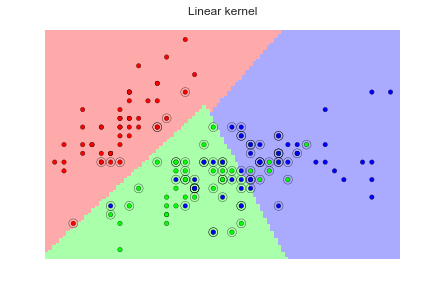

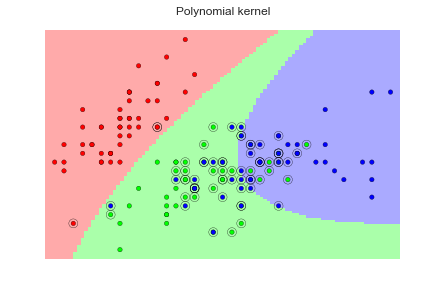

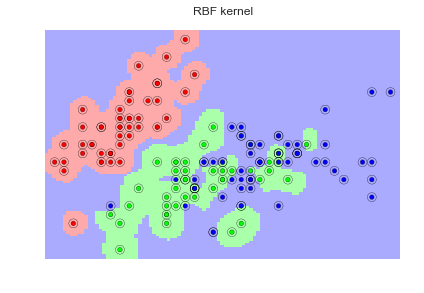

In [35]:
#reload the iris data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Linear kernel')

svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('Polynomial kernel')

svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
plt.title('RBF kernel')

##Exercise: repeat the digits dataset classification using different kernels

In [48]:
svc = svm.SVC(kernel='linear')
from sklearn import datasets
digits = datasets.load_digits()
X, y = digits.data, digits.target
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

#Split the training set into training and testing.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=8)

#Train on the SVM


#Predict, and get y_predictions
